In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from natsort import natsorted

import cv2
import os
import random
import shutil

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

## Collect Data

from two folders with different sub-folders

In [ ]:
train1_dataset_path = "data/train_Images_Source_1/"
train2_dataset_path = "data/train_Images_Source_2/"

In [ ]:
dataset = []
for category in os.listdir(train1_dataset_path):
    category_path = os.path.join(train1_dataset_path, category)
    if os.path.isdir(category_path):
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            dataset.append((image_path, category))

In [ ]:
for image_file in os.listdir(train2_dataset_path):
    category = image_file.split('_')[0]
    image_path = os.path.join(train2_dataset_path, image_file)
    dataset.append((image_path, category))


In [ ]:
random.shuffle(dataset)


## Over-Sampling Data

In [2]:
def load_and_augment_image(image_path, datagen):
    img = load_image(image_path)
    if img is not None:
        img = datagen.random_transform(img)
    return img

def load_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    except Exception as e:
        print(f"Error loading image {image_path}: {str(e)}")
        return None

def save_image(img, path):
    try:
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(path, img_bgr)
        print(f"Saved image to {path}")
    except Exception as e:
        print(f"Error saving image to {path}: {str(e)}")

In [3]:
dataset_path = 'data/all_train/'

target_num_images = max([len(files) for root, dirs, files in os.walk(dataset_path)])

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for class_folder in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder)
    
    num_images = len(os.listdir(class_folder_path))
    
    num_additional_images = target_num_images - num_images
    
    if num_additional_images > 0:
        print(f'Class {class_folder} needs {num_additional_images} additional images.')
        
        augmented_folder = os.path.join(class_folder_path, 'augmented')
        os.makedirs(augmented_folder, exist_ok=True)
        
        while num_additional_images > 0:
            random_image = random.choice(os.listdir(class_folder_path))
            image_path = os.path.join(class_folder_path, random_image)
            
            img = load_and_augment_image(image_path, datagen)
            
            augmented_image_path = os.path.join(augmented_folder, f'augmented_{num_additional_images}.jpg')
            save_image(img, augmented_image_path)
            
            num_additional_images -= 1

print('Oversampling completed.')

Class Ascariasis needs 8 additional images.
Saved image to data/all_train/Ascariasis\augmented\augmented_8.jpg
Saved image to data/all_train/Ascariasis\augmented\augmented_7.jpg
Saved image to data/all_train/Ascariasis\augmented\augmented_6.jpg
Saved image to data/all_train/Ascariasis\augmented\augmented_5.jpg
Saved image to data/all_train/Ascariasis\augmented\augmented_4.jpg
Saved image to data/all_train/Ascariasis\augmented\augmented_3.jpg
Saved image to data/all_train/Ascariasis\augmented\augmented_2.jpg
Saved image to data/all_train/Ascariasis\augmented\augmented_1.jpg
Class Babesia needs 8 additional images.
Saved image to data/all_train/Babesia\augmented\augmented_8.jpg
Saved image to data/all_train/Babesia\augmented\augmented_7.jpg
Saved image to data/all_train/Babesia\augmented\augmented_6.jpg
Saved image to data/all_train/Babesia\augmented\augmented_5.jpg
Saved image to data/all_train/Babesia\augmented\augmented_4.jpg
Saved image to data/all_train/Babesia\augmented\augmented_3

Saved image to data/all_train/Enterobius v\augmented\augmented_13.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_12.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_11.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_10.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_9.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_8.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_7.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_6.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_5.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_4.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_3.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_2.jpg
Saved image to data/all_train/Enterobius v\augmented\augmented_1.jpg
Class Epidermophyton floccosum needs 60 additional images.
Saved image to data/all_train/Epidermoph

Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_82.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_81.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_80.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_79.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_78.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_77.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_76.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_75.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_74.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_73.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_72.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_71.jpg
Saved image to data/all_train/Fasciolopsis buski\augmented\augmented_70.jpg
Saved image 

Saved image to data/all_train/Hookworm egg\augmented\augmented_57.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_56.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_55.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_54.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_53.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_52.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_51.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_50.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_49.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_48.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_47.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_46.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_45.jpg
Saved image to data/all_train/Hookworm egg\augmented\augmented_44.jpg
Saved image to data/

Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_74.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_73.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_72.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_71.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_70.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_69.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_68.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_67.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_66.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_65.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_64.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\augmented_63.jpg
Saved image to data/all_train/Hymenolepis diminuta\augmented\aug

Saved image to data/all_train/Hymenolepis nana\augmented\augmented_119.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_118.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_117.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_116.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_115.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_114.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_113.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_112.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_111.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_110.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_109.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_108.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_107.jpg
Saved image to data/all_t

Saved image to data/all_train/Hymenolepis nana\augmented\augmented_7.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_6.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_5.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_4.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_3.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_2.jpg
Saved image to data/all_train/Hymenolepis nana\augmented\augmented_1.jpg
Class Leishmania needs 15 additional images.
Saved image to data/all_train/Leishmania\augmented\augmented_15.jpg
Saved image to data/all_train/Leishmania\augmented\augmented_14.jpg
Saved image to data/all_train/Leishmania\augmented\augmented_13.jpg
Saved image to data/all_train/Leishmania\augmented\augmented_12.jpg
Saved image to data/all_train/Leishmania\augmented\augmented_11.jpg
Saved image to data/all_train/Leishmania\augmented\augmented_10.jpg
Saved image to data/all_train/Leishm

Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_84.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_83.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_82.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_81.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_80.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_79.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_78.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_77.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_76.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_75.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_74.jpg
Saved image to data/all_train/Opisthorchis viverrine\augmented\augmented_73.jpg
Saved image to data/all_train/Opisthorch

Saved image to data/all_train/Paragonimus spp\augmented\augmented_136.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_135.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_134.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_133.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_132.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_131.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_130.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_129.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_128.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_127.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_126.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_125.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_124.jpg
Saved image to data/all_train/Paragoni

Saved image to data/all_train/Paragonimus spp\augmented\augmented_22.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_21.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_20.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_19.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_18.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_17.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_16.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_15.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_14.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_13.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_12.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_11.jpg
Saved image to data/all_train/Paragonimus spp\augmented\augmented_10.jpg
Saved image to data/all_train/Paragonimus spp\augme

Saved image to data/all_train/T. rubrum\augmented\augmented_125.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_124.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_123.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_122.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_121.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_120.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_119.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_118.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_117.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_116.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_115.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_114.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_113.jpg
Saved image to data/all_train/T. rubrum\augmented\augmented_112.jpg
Saved image to data/all_train/T. rubrum\augmente

Saved image to data/all_train/Taenia spp\augmented\augmented_137.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_136.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_135.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_134.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_133.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_132.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_131.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_130.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_129.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_128.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_127.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_126.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_125.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_124.jpg
Saved image to data/all_train/Taen

Saved image to data/all_train/Taenia spp\augmented\augmented_13.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_12.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_11.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_10.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_9.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_8.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_7.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_6.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_5.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_4.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_3.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_2.jpg
Saved image to data/all_train/Taenia spp\augmented\augmented_1.jpg
Class Trichuris trichiura needs 245 additional images.
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_

Saved image to data/all_train/Trichuris trichiura\augmented\augmented_141.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_140.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_139.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_138.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_137.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_136.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_135.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_134.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_133.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_132.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_131.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_130.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augm

Saved image to data/all_train/Trichuris trichiura\augmented\augmented_34.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_33.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_32.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_31.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_30.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_29.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_28.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_27.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_26.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_25.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_24.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_23.jpg
Saved image to data/all_train/Trichuris trichiura\augmented\augmented_22.jpg

## Splitting Data

In [2]:
all_train_path = "data/all_train/"

In [6]:
dataset = []
for category in os.listdir(all_train_path):
    category_path = os.path.join(all_train_path, category)
    if os.path.isdir(category_path):
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            dataset.append((image_path, category))

In [7]:
random.shuffle(dataset)

In [8]:
train_ratio = 0.8
train_size = int(len(dataset) * train_ratio)

train_dataset = dataset[:train_size]
val_dataset = dataset[train_size:]

In [9]:
train_folder = 'data/all_train_over'
val_folder = 'data/all_val_over'

for image_path, category in train_dataset:
    category_folder = os.path.join(train_folder, category)
    os.makedirs(category_folder, exist_ok=True)
    shutil.copy(image_path, category_folder)

print("train done!")

for image_path, category in val_dataset:
    category_folder = os.path.join(val_folder, category)
    os.makedirs(category_folder, exist_ok=True)
    shutil.copy(image_path, category_folder)
    
print("val done!")

train done!
val done!


## Model Building

In [10]:
train = 'data/all_train_over/'
val = 'data/all_val_over/'

In [11]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
BATCH_SIZE = 32

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rotation_range=30,
    brightness_range=[0.7, 1.3]
)
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 10200 images belonging to 15 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    val,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
)

Found 2550 images belonging to 15 classes.


In [14]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Ascariasis
1 : Babesia
2 : Capillaria p
3 : Enterobius v
4 : Epidermophyton floccosum
5 : Fasciolopsis buski
6 : Hookworm egg
7 : Hymenolepis diminuta
8 : Hymenolepis nana
9 : Leishmania
10 : Opisthorchis viverrine
11 : Paragonimus spp
12 : T. rubrum
13 : Taenia spp
14 : Trichuris trichiura


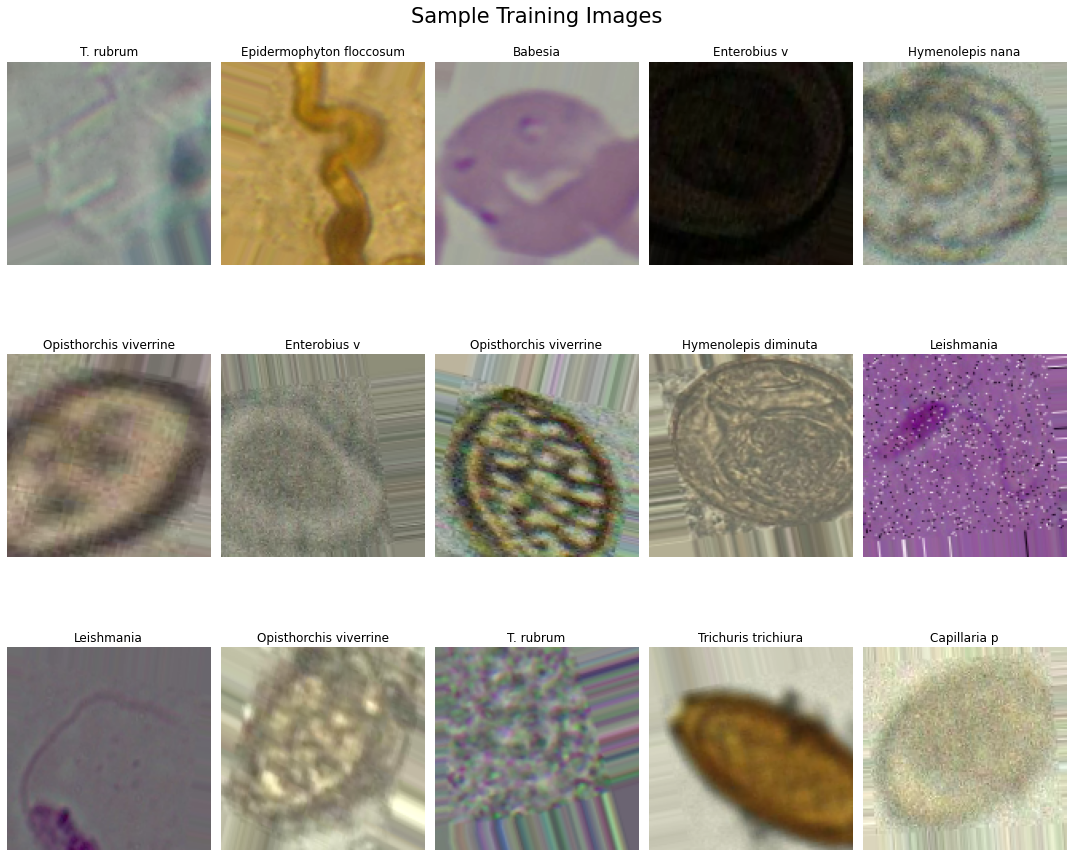

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 13))
idx = 0

for i in range(3):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [16]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), padding='valid', activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=16, kernel_size=(3, 3), padding='valid', activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=15, activation='softmax')
    ])
    
    return model

In [17]:
cnn_model = create_model()
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 62, 62, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                        

In [10]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [11]:
# optimizer = Adam(learning_rate=0.001)

In [18]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,      
    restore_best_weights=True  
)

In [19]:
cnn_model.compile(optimizer="adam", loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [20]:
history = cnn_model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/12
 13/319 [>.............................] - ETA: 10:57 - loss: 2.9051 - accuracy: 0.0697

KeyboardInterrupt: 

75/75 [==============================] - 71s 945ms/step


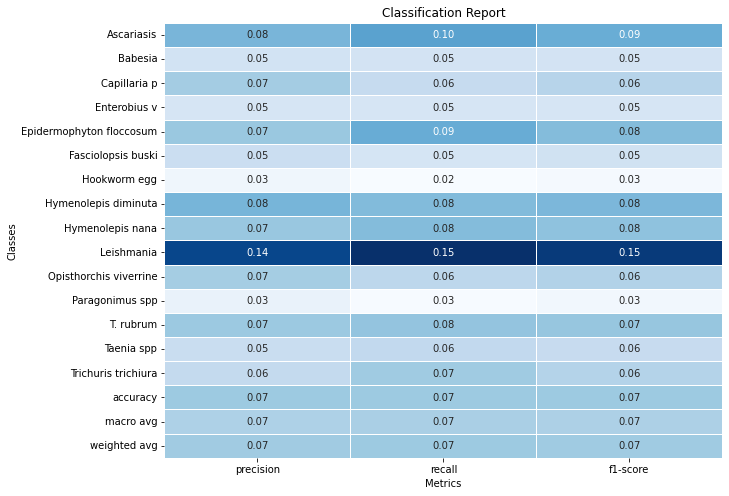

In [16]:
y_true = validation_generator.classes
y_pred_prob = cnn_model.predict(validation_generator) 

y_pred = np.argmax(y_pred_prob, axis=1)

class_names = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()

In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

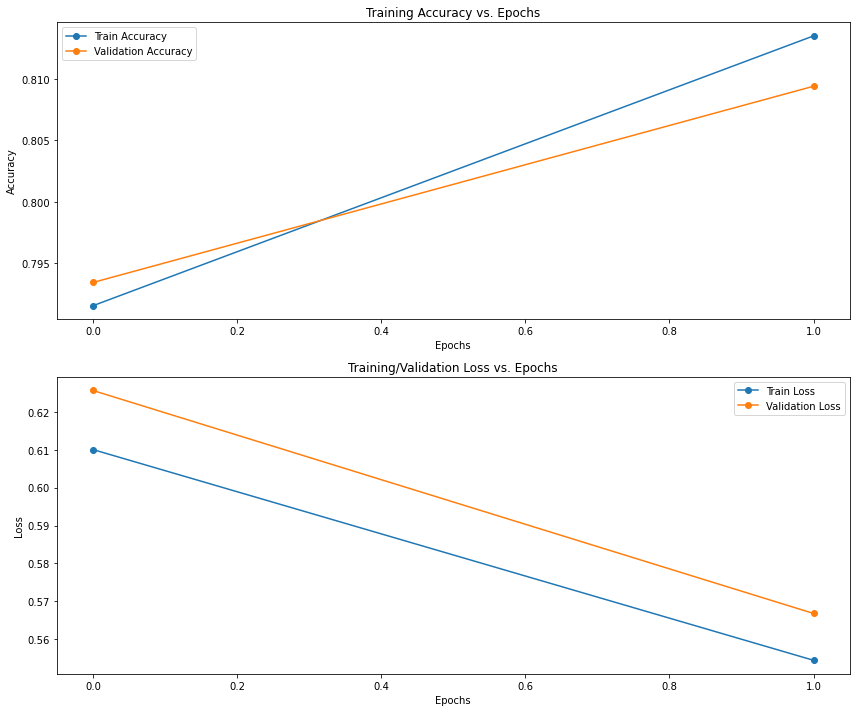

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

#ax[2].set_title('Learning Rate vs. Epochs')
#ax[2].plot(learning_rate, 'o-', label='Learning Rate')
#ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Loss')
#ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

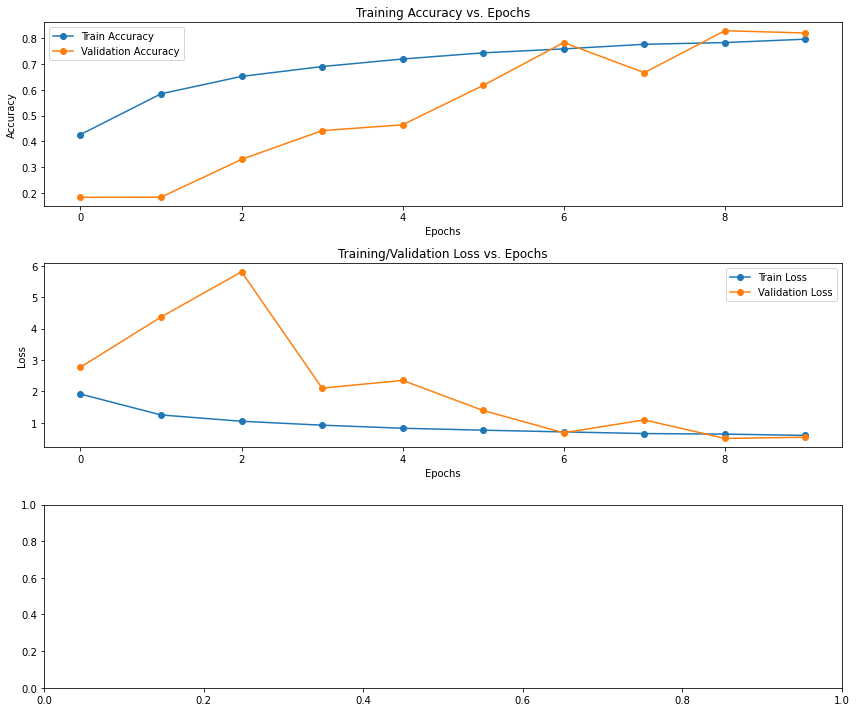

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

#ax[2].set_title('Learning Rate vs. Epochs')
#ax[2].plot(learning_rate, 'o-', label='Learning Rate')
#ax[2].set_xlabel('Epochs')
#ax[2].set_ylabel('Loss')
#ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [14]:
cnn_model.save('model.h5')

In [15]:
from keras.models import load_model
model = load_model('model.h5')

In [19]:
test_data_dir = 'data/test_data'

test_image_files = natsorted([os.path.join(test_data_dir, file) for file in os.listdir(test_data_dir) if file.endswith(('jpg', 'jpeg', 'png'))])

predictions = []

for image_path in test_image_files:

    img = load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0

    prediction = cnn_model.predict(img_array)
    predictions.append(prediction[0])

predictions = np.array(predictions)

submission_df = pd.DataFrame(predictions, columns=['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 
                                                   'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 
                                                   'class_10', 'class_11', 'class_12', 'class_13', 'class_14'])

submission_df['image_name'] = [os.path.basename(file) for file in test_image_files]
submission_df = submission_df[['image_name', 'class_0', 'class_1', 'class_2', 'class_3', 
                               'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 
                               'class_10', 'class_11', 'class_12', 'class_13', 'class_14']]

submission_df.to_csv('submission.csv', index=False)

1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 123ms/step


In [20]:
submission_df.head(10)

,image_name,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,class_10,class_11,class_12,class_13,class_14
0,0.jpg,2.204669e-03,1.114576e-04,1.192879e-05,9.932813e-09,1.106028e-06,4.377707e-07,4.275670e-05,8.276280e-05,5.161951e-08,6.947861e-08,7.844816e-03,1.964793e-06,1.799239e-07,9.396778e-01,5.001995e-02
1,1.jpg,9.018304e-03,1.940043e-05,8.322509e-02,4.441445e-02,6.487992e-01,1.987554e-01,1.347254e-03,6.007625e-05,8.492304e-06,1.239677e-02,1.185286e-04,1.899195e-06,1.778460e-03,3.188677e-06,5.349090e-05
2,2.jpg,2.216378e-03,1.210999e-07,5.183939e-04,1.228739e-04,9.289746e-01,1.161834e-02,8.156029e-05,2.380882e-04,7.724024e-06,3.823708e-05,1.777961e-04,1.256564e-05,5.595495e-02,8.526317e-07,3.748013e-05
3,3.jpg,9.235330e-04,2.450410e-08,1.072255e-04,3.883114e-05,9.231782e-01,3.086201e-04,6.334109e-06,3.639630e-04,2.785646e-06,2.332250e-04,3.445219e-05,3.838361e-07,7.479134e-02,9.961611e-07,1.019220e-05
4,4.jpg,2.008145e-03,4.408535e-06,1.287136e-01,5.108967e-01,2.740413e-01,7.531296e-02,9.224613e-04,2.736625e-04,1.249100e-03,2.953185e-04,1.268654e-03,1.117432e-05,4.788850e-03,3.329106e-05,1.803357e-04
5,5.jpg,6.491393e-09,4.576021e-05,2.190404e-08,2.131315e-07,2.647967e-06,1.281791e-09,8.943951e-11,2.284671e-11,1.915899e-11,9.999297e-01,2.422724e-10,1.876246e-11,2.169411e-05,7.115750e-12,8.331724e-10
6,6.jpg,2.388375e-01,6.978399e-05,1.737595e-02,1.715247e-05,8.640320e-05,2.561773e-01,1.332678e-02,2.694923e-03,5.200399e-04,9.618693e-06,1.999985e-04,4.595194e-01,2.417316e-05,6.058573e-05,1.108039e-02
7,7.jpg,4.153216e-09,9.999450e-01,4.851159e-09,3.741859e-11,2.321972e-08,9.340314e-10,1.048007e-09,6.490260e-11,1.731838e-11,5.136595e-05,1.361990e-08,5.018474e-10,3.588352e-06,1.089858e-09,1.592847e-08
8,8.jpg,2.494587e-01,2.769657e-06,1.301549e-02,2.065241e-05,1.776115e-01,3.770534e-01,9.661940e-02,1.367965e-04,5.862243e-03,5.142358e-05,1.096761e-05,9.201233e-08,8.015329e-02,2.931499e-06,2.750213e-07
9,9.jpg,2.067186e-06,6.016931e-08,5.244081e-07,6.814720e-12,5.268789e-09,7.467193e-09,1.493823e-07,5.820701e-14,8.574971e-13,2.968226e-10,1.406536e-04,4.467652e-06,4.997576e-10,5.802791e-09,9.998521e-01


In [18]:
dataset = []
for category in os.listdir(train1_dataset_path):
    category_path = os.path.join(train1_dataset_path, category)
    if os.path.isdir(category_path):
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            dataset.append((image_path, category))

In [20]:
for image_file in os.listdir(train2_dataset_path):
    category = image_file.split('_')[0]  # Extract category from the image file name
    image_path = os.path.join(train2_dataset_path, image_file)
    dataset.append((image_path, category))


In [21]:
random.shuffle(dataset)


In [25]:
train_ratio = 0.8  # Adjust as needed
train_size = int(len(dataset) * train_ratio)

train_dataset = dataset[:train_size]
val_dataset = dataset[train_size:]

In [26]:
train_folder = 'data/train_folder'
val_folder = 'data/val_folder'

for image_path, category in train_dataset:
    category_folder = os.path.join(train_folder, category)
    os.makedirs(category_folder, exist_ok=True)
    shutil.copy(image_path, category_folder)

for image_path, category in val_dataset:
    category_folder = os.path.join(val_folder, category)
    os.makedirs(category_folder, exist_ok=True)
    shutil.copy(image_path, category_folder)